<a href="https://colab.research.google.com/github/johnboscoimmanuel/Task/blob/main/Random_Forest_Assignment16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#Social_Network_Ads.csv

**Importing the libraries**

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

**Importing the dataset**

In [74]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [75]:
df.shape

(400, 5)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [77]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [78]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [79]:
df.select_dtypes(['object']).head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male


In [80]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [81]:
label=LabelEncoder()

df['Gender']=label.fit_transform(df['Gender'])

In [82]:
df['Gender'].unique()

array([1, 0])

**Splitting the dataset into the Training set and Test set**

In [83]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [84]:
x=df.drop(columns=['User ID','Purchased'],axis=1)

y=df['Purchased']




In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Feature Scaling**

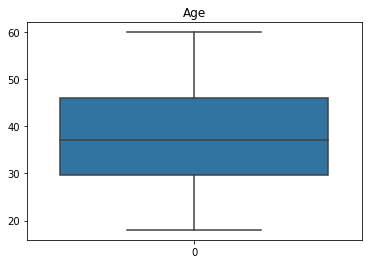

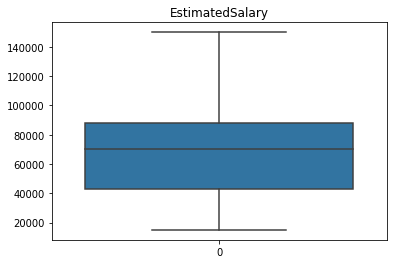

In [89]:
sns.boxplot(data=df['Age'])
plt.title("Age")
plt.show()

sns.boxplot(data=df['EstimatedSalary'])
plt.title('EstimatedSalary')
plt.show()

In [90]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

**Fitting Random Forest to the Training set**

In [91]:
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

**Predicting the Test set results**

In [93]:
y_pred=forest.predict(x_test)

In [94]:
print('accuracy_score: ',accuracy_score(y_test,y_pred))

accuracy_score:  0.9125


**Making the Confusion Matrix**

In [95]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[54,  4],
       [ 3, 19]])

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        58
           1       0.83      0.86      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.91      0.91      0.91        80



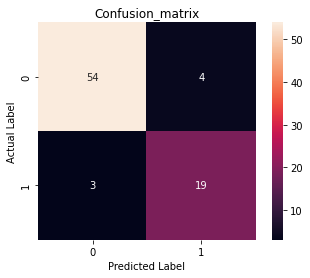

In [99]:
sns.heatmap(data=cm,annot=True,square=True)
plt.title('Confusion_matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [108]:
print('roc_auc_score: ',roc_auc_score(y_test,y_pred))

roc_auc_score:  0.8973354231974922
